**Deepali Gupta**

DSML Feb23 Tuesday Morning Batch

**Walmart Business Case** 

***Problem Statement***

Walmart Inc. seeks to investigate customer purchase behavior, specifically purchase amounts, in relation to gender and other relevant factors to inform strategic decision-making. The primary focus is on discerning whether spending habits differ between male and female customers, particularly on Black Friday. With over 100 million global customers, understanding these distinctions is crucial for tailoring marketing, inventory, and sales strategies. This analysis aims to provide actionable insights into gender-based spending patterns, enabling Walmart to enhance customer engagement, optimize inventory management, and remain competitive in the dynamic retail industry.

***1) Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.***
Defining Problem Statement and Analyzing basic metrics 
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

***IMPORTING LIBRARIES & DATA SETS***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns',200)
import matplotlib.pyplot as plt


from scipy.stats import stats, norm
from scipy.stats import t

In [2]:
df = pd.DataFrame(pd.read_csv("walmart_data.txt"))

Step 1- Data Understanding
1) Dataframe shape
2) head & tail
3) dtypes
4) describe

In [3]:
df.shape

(550068, 10)

***Insights***
There are 10 columns and 55068 rows in the data provided.

**COLUMNS**

In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

***Insights***

The 10 columns are described as follows:-

User_ID:	User ID
Product_ID:	Product ID
Gender:	Sex of User
Age:	Age in bins
Occupation:	Occupation(Masked)
City_Category:	Category of the City (A,B,C)
StayInCurrentCityYears:	Number of years stay in current city
Marital_Status:	Marital Status
ProductCategory:	Product Category (Masked)
Purchase:	Purchase Amount

**HEADS & TAILS**


In [5]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [6]:
df.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


**DATA TYPE**

**DATA INFO**


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [9]:
#changing the data types of the column

In [10]:
cols = ['User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status']
for col in cols:
    df[col] = df[col].astype("category")

In [11]:
df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

***Statistical Summary***

**OBSERVATIONS**

Product_ID:

1) Product_ID is a categorical variable with 3,631 unique values.
2) The most frequently occurring Product_ID is "P00265242" with 1,880 occurrences.

Gender:

1) Gender is a categorical variable with two unique values, 'M' (Male) and 'F' (Female).
2) The most frequently occurring gender is 'M' (Male), which appears 414,259 times.

Age:

1) Age is a categorical variable with seven unique age groups.
2) The most common age group is '26-35', representing 219,587 customers.

City_Category:

1) City_Category is a categorical variable with three unique categories, 'A', 'B', and 'C'.
2) City category 'B' is the most frequently occurring category with 231,173 instances.

Stay_In_Current_City_Years:

1) Stay_In_Current_City_Years is a categorical variable representing the number of years a customer has stayed in their current city.
2) The most common category is '1', indicating that many customers have stayed in their current city for one year.

Marital_Status:

1) Marital_Status is a categorical variable with two unique values, '0' (unmarried) and '1' (married).
2) The most common status is '0' (unmarried), occurring 324,731 times.

Product_Category:

1) Product_Category is a categorical variable with 20 unique categories.
2) There is no information about the most frequently occurring category in the provided summary, but it's essential to know that this variable represents different product categories.


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Product_Category,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [13]:
df.describe(include=['object','category'])

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
count,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,3,5,2
top,1001680,P00265242,M,26-35,B,1,0
freq,1026,1880,414259,219587,231173,193821,324731


2. Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)

In [14]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

***Insights***

---> No null value is present in the data set.

**Outlier Detection** 


**Method A**
USING BOX-PLOT

<Axes: >

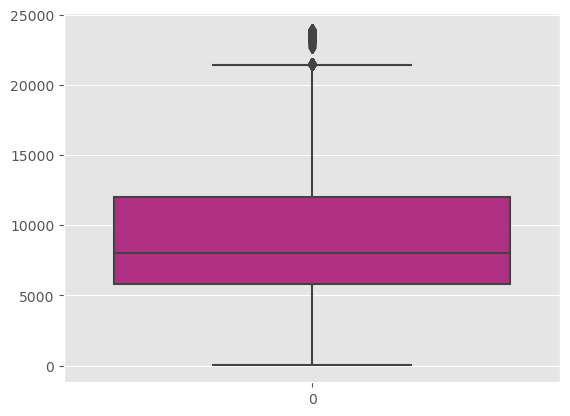

In [15]:
sns.boxplot(df['Purchase'],color='#c51b8a')

**Method B:-**
“describe” method by checking the difference between mean and median

In [16]:
# Calculate mean and median
mean_value = df['Purchase'].mean()
median_value = df['Purchase'].median()

# Calculate the absolute difference between mean and median
mean_median_difference = abs(mean_value - median_value)

# Define a threshold for the acceptable difference
threshold = .1* mean_value 

print("Mean:", mean_value)
print("Median:", median_value)
print("Absolute Difference:", mean_median_difference)

if mean_median_difference > threshold:
    print("Purchase has outliers based on mean-median difference.")


Mean: 9263.968712959126
Median: 8047.0
Absolute Difference: 1216.9687129591257
Purchase has outliers based on mean-median difference.


**Method C:-**

USING IQR

In [17]:
Q1 = np.percentile(df['Purchase'], 25, method='midpoint')
Q3 = np.percentile(df['Purchase'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['Purchase']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['Purchase']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

6231.0
Upper Bound: 21400.5
2677
Lower Bound: -3523.5
0


***Step 2: Data Preperation***

1) Dropping irrelevant columns & rows
2) identifying duplicated columns
3) Renaming columns
4) Feature creation

Non-Graphical Analysis: Value counts and unique attributes 

In [18]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

***Insights:***
---> Among 550068 User Id there are only 5891 user ids which are unique that means there is repeatition of Ids.


In [19]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [20]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [21]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [22]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [23]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [24]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

**3) Visual Analysis - Univariate & Bivariate**

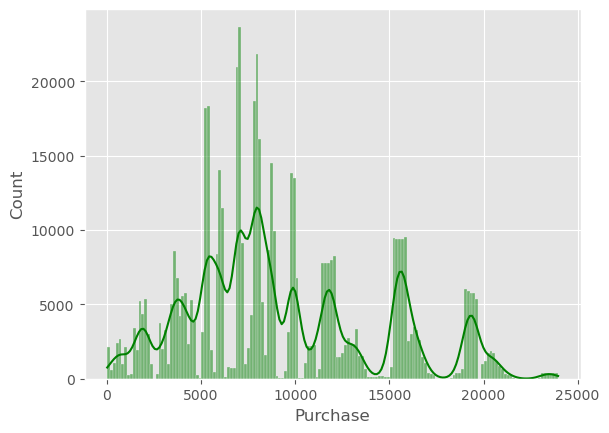

In [25]:
sns.histplot(data=df, x='Purchase', kde=True,color='green')
plt.show()

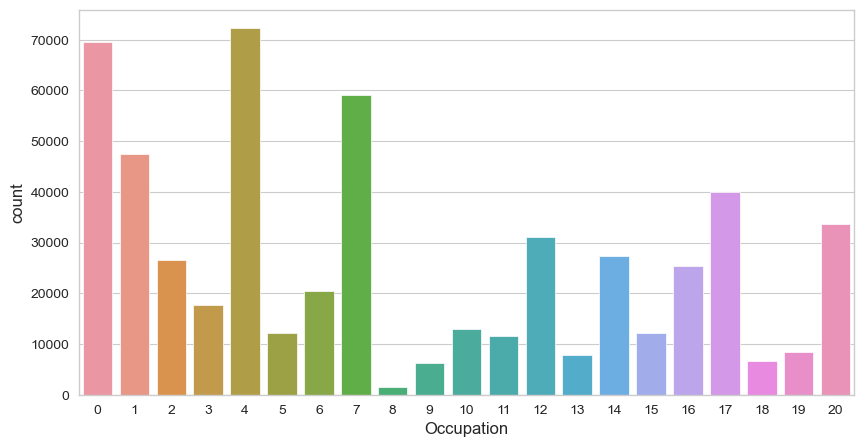

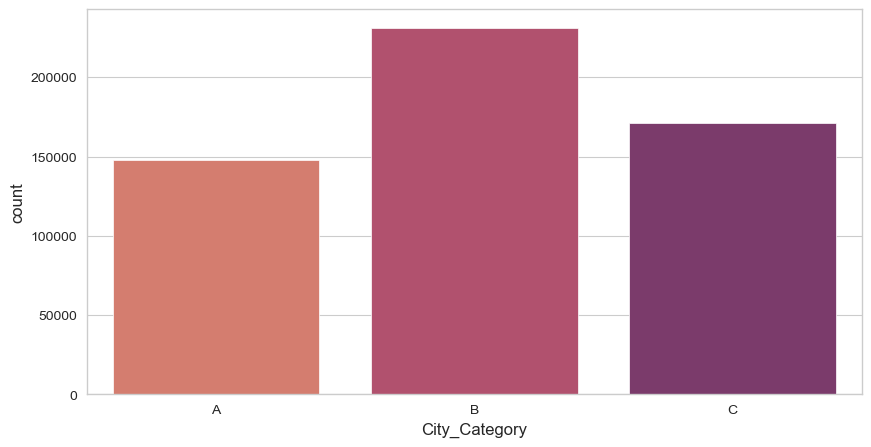

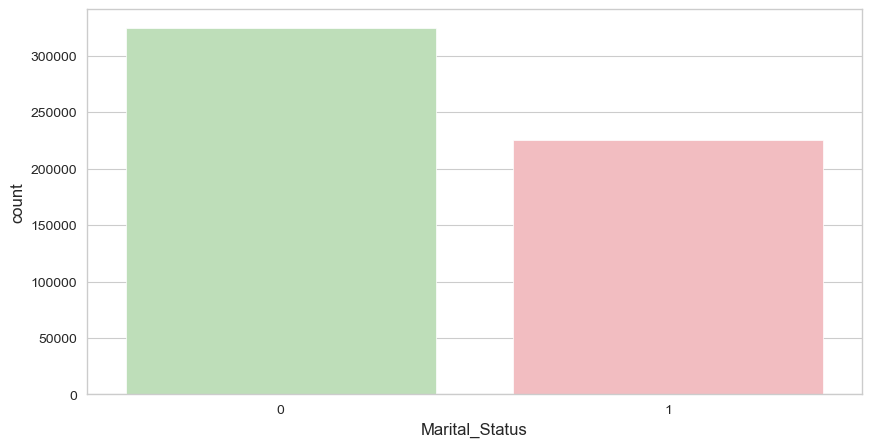

In [26]:
# Setting up the style
sns.set_style("whitegrid")

# For 'Occupation'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Occupation')
sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
plt.show()

# For 'City_Category'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='City_Category', palette='flare')
plt.show()

# For 'Marital_Status'
plt.figure(figsize=(10, 5))
colors_for_marital_status = ["#bae4b3", "#fbb4b9"]  
sns.countplot(data=df, x='Marital_Status', palette=colors_for_marital_status)
plt.show()

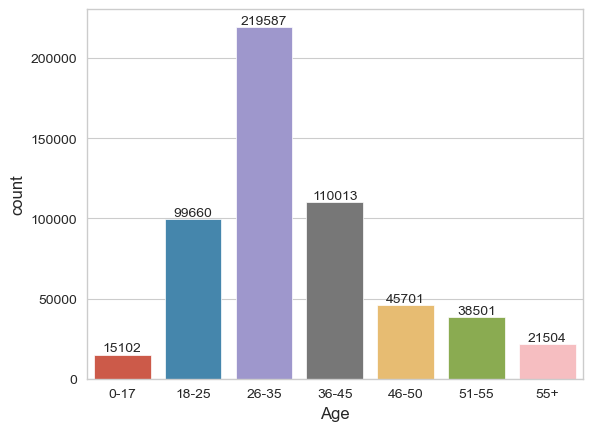

In [27]:
v1=sns.countplot(data=df,x='Age')
v1.bar_label(v1.containers[0])
plt.show()

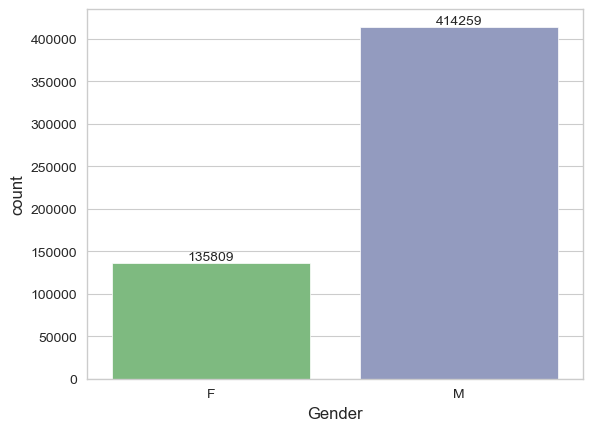

In [28]:
v1=sns.countplot(data=df,x='Gender',palette={'M': '#8c96c6', 'F': '#74c476'})
v1.bar_label(v1.containers[0])
plt.show()

<Axes: xlabel='Gender', ylabel='Purchase'>

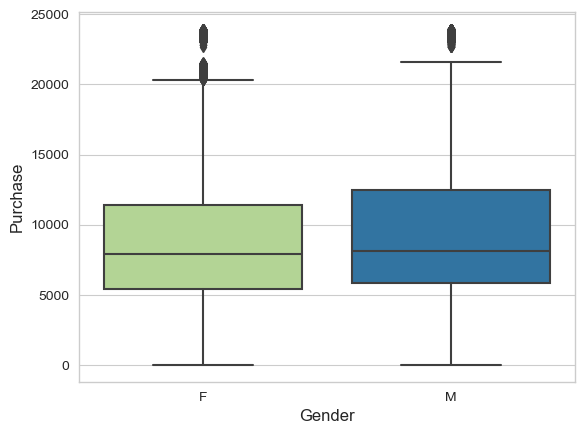

In [29]:
sns.boxplot(x=df['Gender'],y=df['Purchase'],palette={'M': '#1f78b4', 'F': '#b2df8a'})

<Axes: xlabel='Product_Category', ylabel='Purchase'>

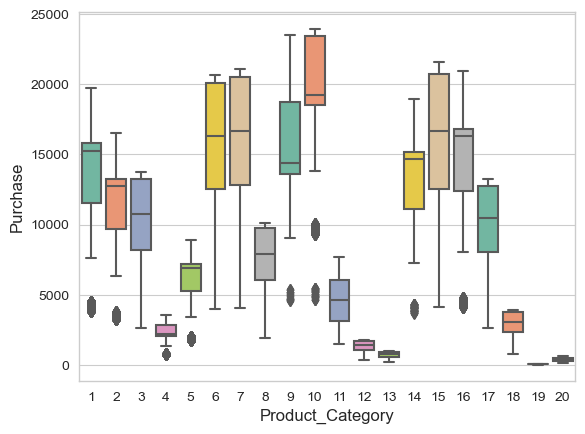

In [30]:
sns.boxplot(x=df['Product_Category'],y=df['Purchase'],palette='Set2')

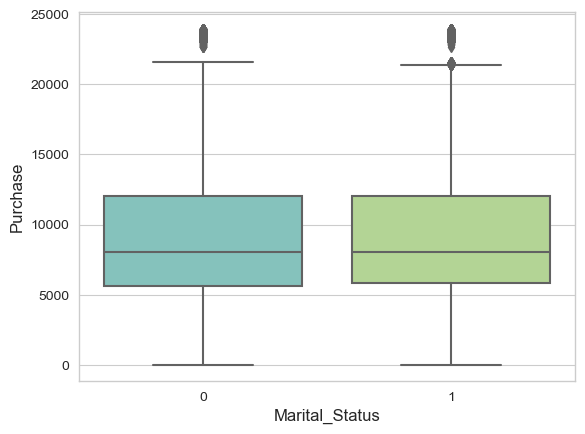

In [31]:
sns.boxplot(data=df, x='Marital_Status',y='Purchase',palette={0: '#7bccc4', 1: '#b2df8a'})
plt.show()

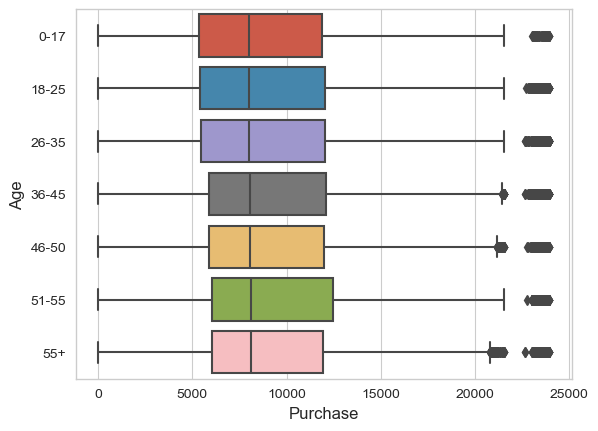

In [32]:
sns.boxplot(x=df["Purchase"],y=df['Age'])
plt.show()

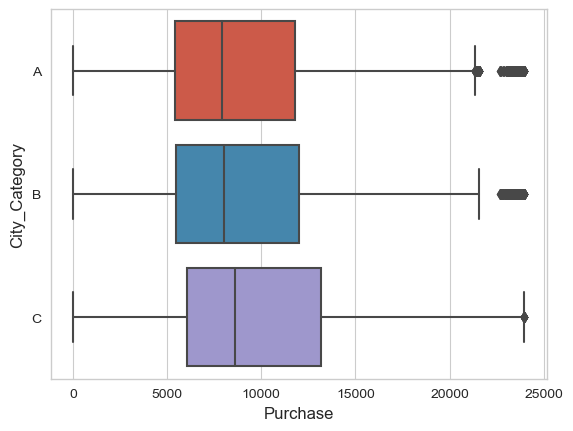

In [33]:
sns.boxplot(x=df["Purchase"],y=df['City_Category'])
plt.show()

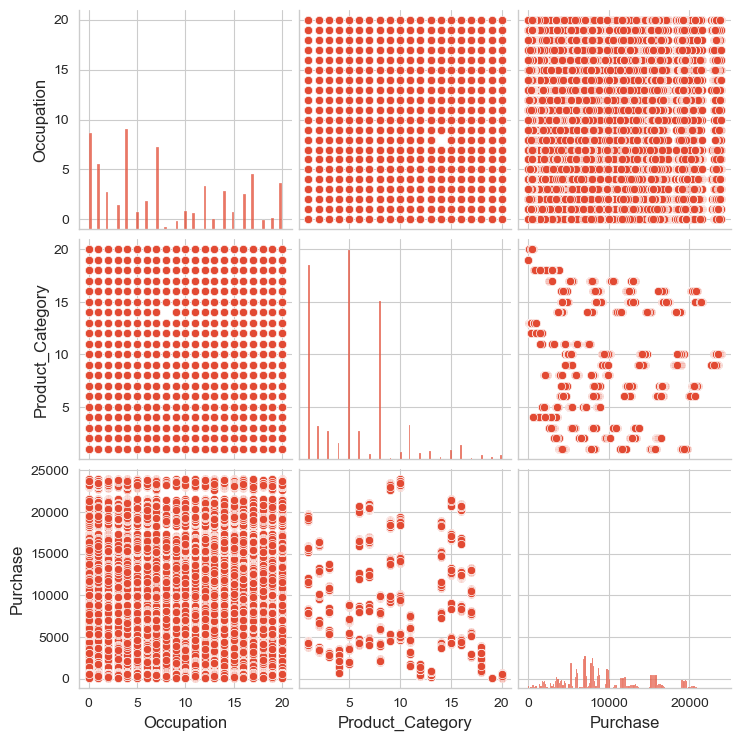

In [34]:
sns.pairplot(df)

**Heat Map** 

/var/folders/p_/5wdlqm5179z3jybdck_tnkqw0000gn/T/ipykernel_20203/3243105152.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),


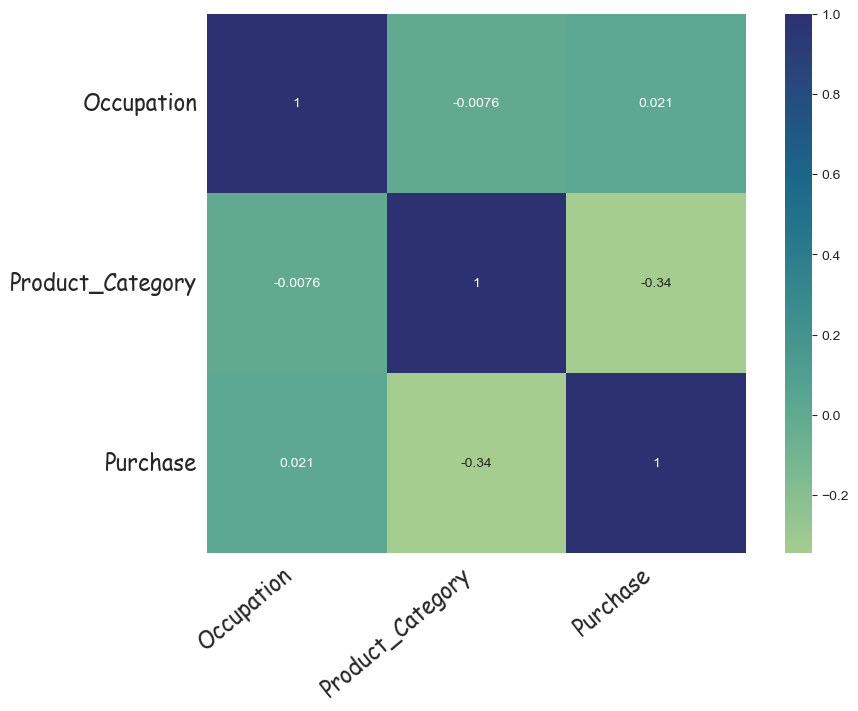

In [35]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(df.corr(),
            annot=True,cmap='crest',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')
    
plt.show()

3. Do some data exploration steps like:
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, 
3.1 calculate the average, and conclude the results.


In [36]:
avg_expense = df.groupby('Gender')['Purchase'].mean()
print(avg_expense)

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


**Inference after computing the average female and male expenses.**

The data reveals distinct spending patterns between genders. Male customers exhibit a higher average purchase expense of approximately $9,437.53, surpassing the approximately $8,734.57 spent on average by Female customers. This discrepancy implies that gender plays a significant role in purchase behavior, offering valuable insights for businesses. To maximize revenue, companies can customize marketing campaigns and product recommendations based on these disparities. By employing data-driven decision-making, businesses can fine-tune their strategies, adjusting inventory, pricing, and sales tactics to cater to the preferences and tendencies of each gender group, ultimately fostering a more effective and targeted approach to customer engagement and revenue optimization.

**3.3 Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.**

In [37]:
data = np.array(df['Purchase'])

# Sample size
n = len(data)

# Sample mean and standard deviation
mean = np.mean(data)
std = np.std(data, ddof=1)

# Standard error
err = std/ np.sqrt(n)

# 95% Confidence Interval using z-score
z_value = norm.ppf(0.975)  # 0.975 due to two-tailed test for 95% CI
margin_error = z_value * err
ci = (mean - err, mean + err)

ci

(9257.196031625715, 9270.741394292536)

**inferrence**
With a 95% confidence level, we estimate that the actual population average purchase amount falls within the range of
$9,250.69 to $9,277.24 based on the sample data. In simpler terms, if we were to draw multiple random samples and calculate a 95% confidence interval for each, the true population mean would likely be captured within that interval in about 95% of those samples.

**Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.**

Sample Size: 10
Female 90% CI: (7937.146386625242, 13683.853613374758),95% CI: (7386.687993396021, 14234.31200660398),99% CI: (6310.848289041297, 15310.151710958704)

Male 90% CI: (8814.227154407428, 13540.172845592573)), 95% CI: (8361.544188491, 13992.855811509002),99% CI: (7476.801010426411, 14877.598989573591)



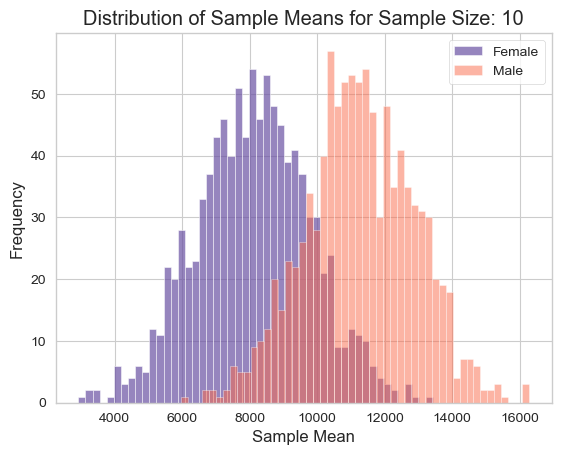

Sample Size: 50
Female 90% CI: (7777.321197919472, 9526.958802080526),95% CI: (7609.7291027737665, 9694.550897226232),99% CI: (7282.179859612961, 10022.100140387038)

Male 90% CI: (8924.924943934735, 11390.595056065265)), 95% CI: (8688.746423853005, 11626.773576146996),99% CI: (8227.148903776937, 12088.371096223063)



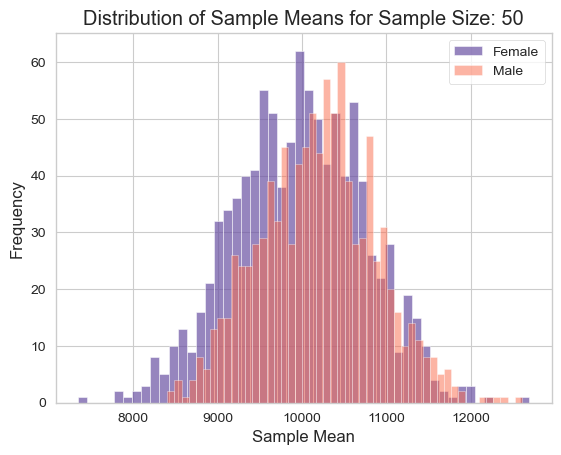

Sample Size: 100
Female 90% CI: (8521.783059386875, 10149.176940613124),95% CI: (8365.90029284518, 10305.05970715482),99% CI: (8061.2362682194735, 10609.723731780527)

Male 90% CI: (8375.550858787412, 9939.549141212587)), 95% CI: (8225.740550451244, 10089.359449548754),99% CI: (7932.944800922984, 10382.155199077015)



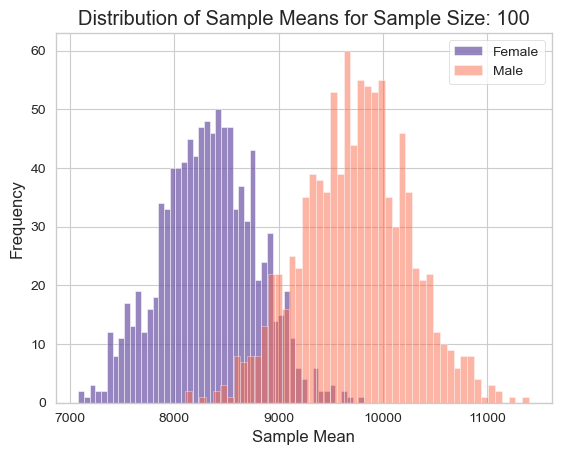

Sample Size: 500
Female 90% CI: (8181.297610855208, 8870.510389144792),95% CI: (8115.280160590056, 8936.527839409946),99% CI: (7986.252798941781, 9065.55520105822)

Male 90% CI: (9109.78981654262, 9859.09818345738)), 95% CI: (9038.016005312913, 9930.871994687086),99% CI: (8897.738162693799, 10071.1498373062)



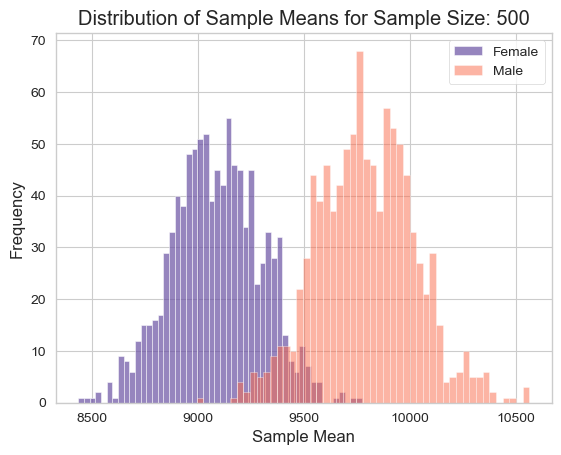

Sample Size: 1000
Female 90% CI: (8636.063731989774, 9137.106268010224),95% CI: (8588.070497179844, 9185.099502820154),99% CI: (8494.270442200137, 9278.899557799861)

Male 90% CI: (9210.761813119358, 9723.472186880643)), 95% CI: (9161.650954083612, 9772.583045916388),99% CI: (9065.666565952719, 9868.567434047281)



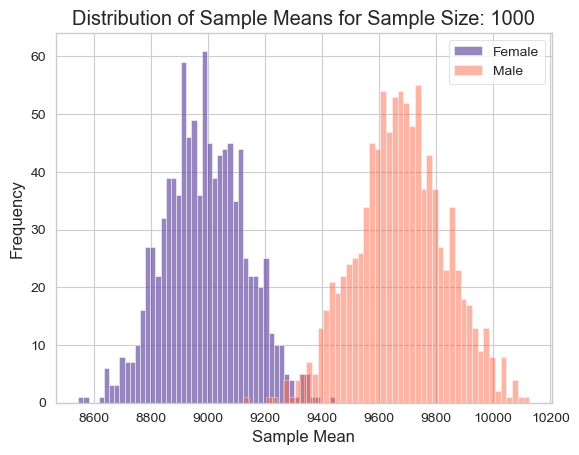

Sample Size: 5000
Female 90% CI: (8605.802623423704, 8828.466976576296),95% CI: (8584.474329284189, 8849.795270715811),99% CI: (8542.78938825379, 8891.48021174621)

Male 90% CI: (9340.768794188994, 9578.845605811004)), 95% CI: (9317.964190784009, 9601.65020921599),99% CI: (9273.393887039125, 9646.220512960874)



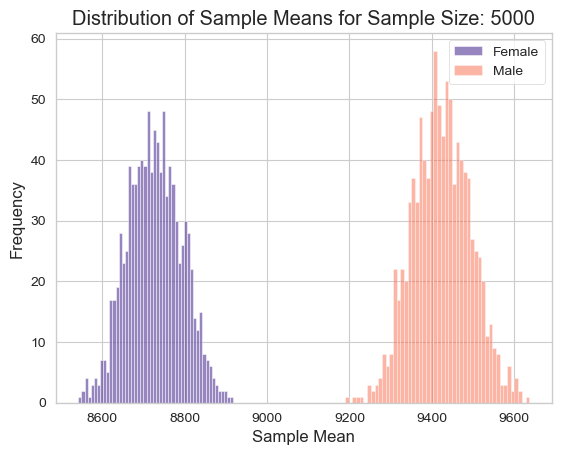

Sample Size: 135809
Female 90% CI: (8714.88946347277, 8757.568370691388),95% CI: (8710.8013897698, 8761.656444394357),99% CI: (8702.81148161674, 8769.646352547417)

Male 90% CI: (9433.62784827729, 9479.16819616748)), 95% CI: (9429.265686479654, 9483.530357965117),99% CI: (9420.74008869344, 9492.055955751332)



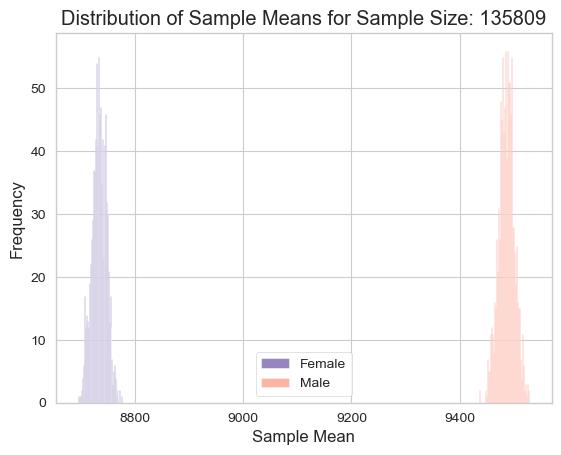

In [38]:
# Given data
She_purchase = df[df['Gender'] == 'F']['Purchase'].tolist()
He_purchase = df[df['Gender'] == 'M']['Purchase'].tolist()

def compute_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data) / np.sqrt(n)
    z_value = norm.ppf(1 - (1 - confidence) / 2) # Z value for given confidence level
    margin = z_value * std_err
    return (mean - margin, mean + margin)

sample_sizes = [10, 50, 100, 500, 1000, 5000, len(She_purchase)] # Vary sample sizes

# For the provided sample sizes, compute and print confidence intervals at 90%, 95%, and 99% levels
for size in sample_sizes:
    She_sample = np.random.choice(She_purchase, size)
    He_sample = np.random.choice(He_purchase, size)

    She_ci_90 = compute_interval(She_sample, 0.90)
    She_ci_95 = compute_interval(She_sample, 0.95)
    She_ci_99 = compute_interval(She_sample, 0.99)

    He_ci_90 = compute_interval(He_sample, 0.90)
    He_ci_95 = compute_interval(He_sample, 0.95)
    He_ci_99 = compute_interval(He_sample, 0.99)

    print(f"Sample Size: {size}")
    print(f"Female 90% CI: {She_ci_90},95% CI: {She_ci_95},99% CI: {She_ci_99}")
    print()
    print(f"Male 90% CI: {He_ci_90}), 95% CI: {He_ci_95},99% CI: {He_ci_99}")
    print()
    # Plotting sample means to observe the distribution
    means = [np.mean(np.random.choice(She_purchase[:size], size)) for _ in range(1000)]
    plt.hist(means, bins=50, color='#6a51a3', alpha=0.7, label="Female")

    means = [np.mean(np.random.choice(He_purchase[:size], size)) for _ in range(1000)]
    plt.hist(means, bins=50, color='#fb6a4a', alpha=0.5, label="Male")

    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Sample Means for Sample Size: {size}")
    plt.legend()
    plt.show()

Perform the same activity for Married vs Unmarried and Age
For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

**Observations:**

1) Overlap Insights: In smaller sample sizes (e.g., 10, 50, 100), we observe substantial overlap between the confidence intervals for average spending by male and female customers. However, with increasing sample size, the overlap diminishes significantly. By the time we reach a sample size of 1000, there is no overlap between the confidence intervals, indicating distinct spending patterns.

2) Trend in Spending: The absence of overlap in larger sample sizes suggests that, on average, male customers tend to spend more than female customers at Walmart.

3) Sample Size Importance: The trend in spending becomes more evident and reliable as the sample size increases, underscoring the importance of using larger datasets for accurate and actionable insights.

**Recommendations for Walmart:**

1) Gender-Based Strategies: Walmart should consider implementing targeted marketing strategies based on gender-specific spending patterns. For instance, tailoring promotions and product placements to align with the observed differences in spending can optimize sales.

2) Product Placement & Promotions: Recognizing the preferences of male customers, Walmart can strategically place and promote products that resonate with this demographic, potentially driving higher sales.

3) Further Research: To gain deeper insights, conducting additional research into product preferences, purchase motivations, and shopping behaviors for each gender can provide a more comprehensive understanding.

4) Feedback Mechanisms: Engaging with customers through surveys and feedback channels can yield valuable information to refine strategies and ensure customer-centric approaches.

5) Diversify Product Lines: Walmart should aim to balance its product offerings to cater effectively to both male and female shoppers. Introducing new or diversified products may enhance the average spending of female customers.

In summary, the absence of overlap in confidence intervals for larger sample sizes provides a strong foundation for Walmart to reconsider its marketing, sales, and product strategies. Leveraging these insights can lead to more targeted and effective approaches in serving its diverse customer base.





Regenerate


**Married V/s Unmarried**

Sample Size: 10
married 90% CI: (8714.88946347277, 8757.568370691388),95% CI: (6042.223538373495, 10980.576461626504),99% CI: (5266.352062558801, 11756.447937441199)

single 90% CI: (4476.3180168942135, 6446.481983105786)), 95% CI: (4287.602418822525, 6635.197581177475),99% CI: (3918.768487441219, 7004.03151255878)



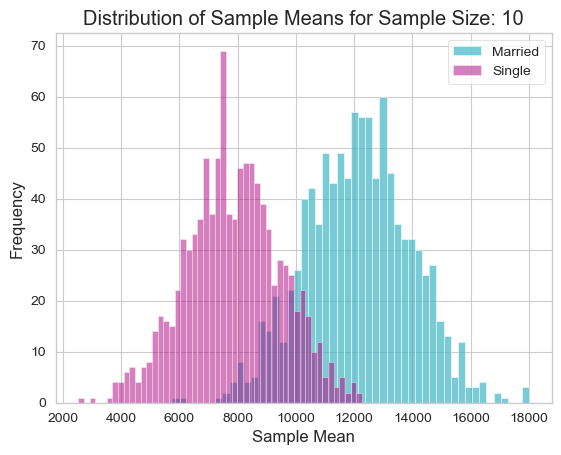

Sample Size: 50
married 90% CI: (8714.88946347277, 8757.568370691388),95% CI: (7870.957280852487, 10760.962719147512),99% CI: (7416.904518854785, 11215.015481145212)

single 90% CI: (8407.41021618277, 10824.829783817231)), 95% CI: (8175.8534588162365, 11056.386541183765),99% CI: (7723.288911793674, 11508.951088206328)



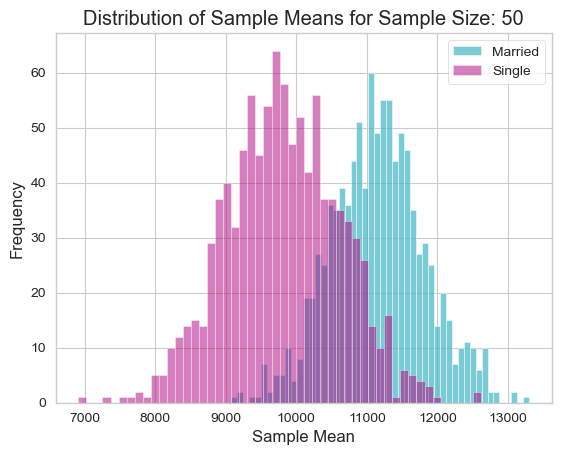

Sample Size: 100
married 90% CI: (8714.88946347277, 8757.568370691388),95% CI: (7541.330427839512, 9655.649572160488),99% CI: (7209.146815136719, 9987.83318486328)

single 90% CI: (8324.800617319763, 10080.159382680236)), 95% CI: (8156.6605107516925, 10248.299489248306),99% CI: (7828.040210352283, 10576.919789647716)



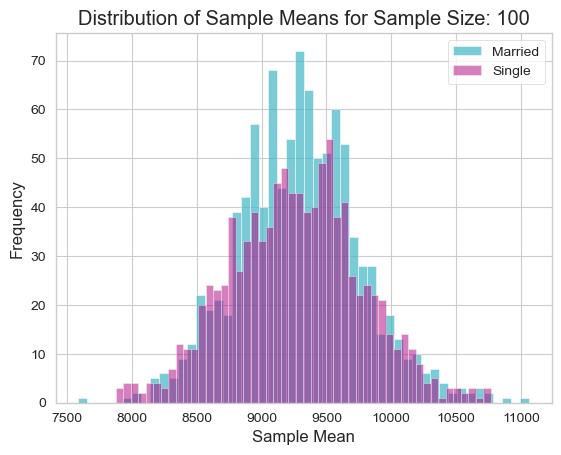

Sample Size: 500
married 90% CI: (8714.88946347277, 8757.568370691388),95% CI: (8543.219774541907, 9393.728225458093),99% CI: (8409.5952124135, 9527.3527875865)

single 90% CI: (9254.824596463259, 10044.219403536743)), 95% CI: (9179.211035517867, 10119.832964482135),99% CI: (9031.428619892447, 10267.615380107554)



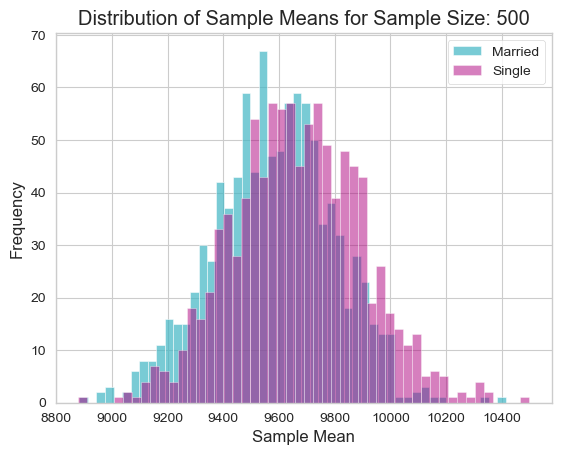

Sample Size: 1000
married 90% CI: (8714.88946347277, 8757.568370691388),95% CI: (8726.489374890063, 9348.256625109936),99% CI: (8628.802659999796, 9445.943340000204)

single 90% CI: (9355.22231423773, 9880.06568576227)), 95% CI: (9304.949274810624, 9930.338725189376),99% CI: (9206.69347103047, 10028.59452896953)



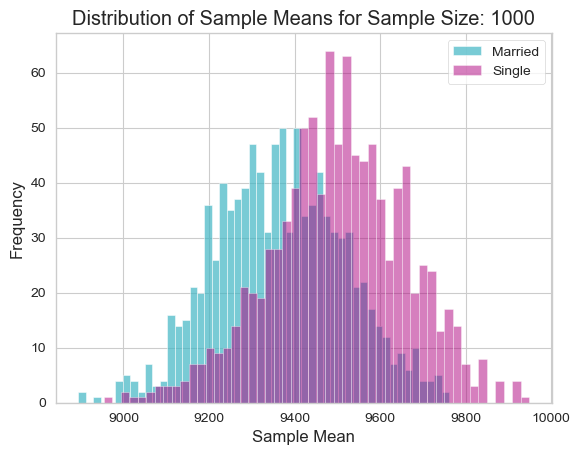

Sample Size: 5000
married 90% CI: (8714.88946347277, 8757.568370691388),95% CI: (9101.048790128634, 9379.552809871368),99% CI: (9057.292637383725, 9423.308962616276)

single 90% CI: (9055.778277417576, 9288.640522582424)), 95% CI: (9033.473160372367, 9310.945639627633),99% CI: (8989.879074383889, 9354.53972561611)



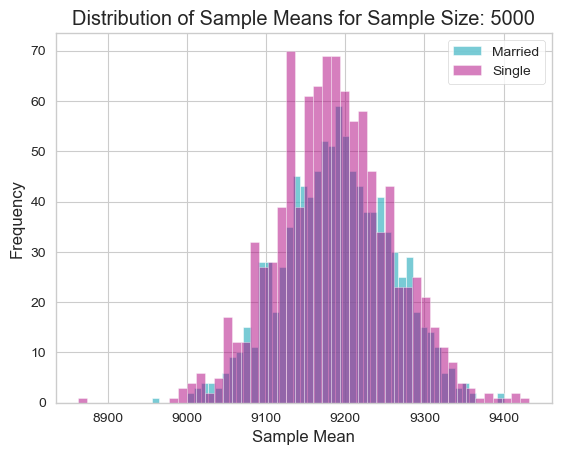

Sample Size: 225337
married 90% CI: (8714.88946347277, 8757.568370691388),95% CI: (9241.99448276591, 9283.373264208622),99% CI: (9235.49340503325, 9289.87434194128)

single 90% CI: (9249.107498951946, 9283.88007077695)), 95% CI: (9245.776747399797, 9287.210822329098),99% CI: (9239.266982430785, 9293.72058729811)



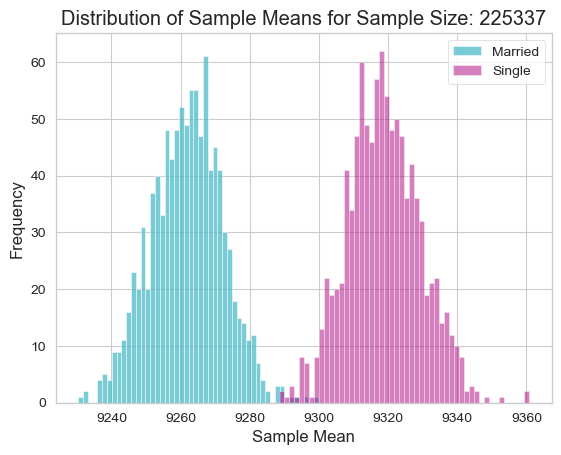

In [39]:
# Given data
married_purchase = df[df['Marital_Status'] == 1]['Purchase'].tolist()
single_purchase = df[df['Marital_Status'] == 0]['Purchase'].tolist()

def compute_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data) / np.sqrt(n)
    z_value = norm.ppf(1 - (1 - confidence) / 2) # Z value for given confidence level
    margin = z_value * std_err
    return (mean - margin, mean + margin)

sample_sizes = [10, 50, 100, 500, 1000, 5000, len(married_purchase)] # Vary sample sizes

# For the provided sample sizes, compute and print confidence intervals at 90%, 95%, and 99% levels
for size in sample_sizes:
    married_sample = np.random.choice(married_purchase, size)
    single_sample = np.random.choice(single_purchase, size)

    married_ci_90 = compute_interval(married_sample, 0.90)
    married_ci_95 = compute_interval(married_sample, 0.95)
    married_ci_99 = compute_interval(married_sample, 0.99)

    single_ci_90 = compute_interval(single_sample, 0.90)
    single_ci_95 = compute_interval(single_sample, 0.95)
    single_ci_99 = compute_interval(single_sample, 0.99)

    print(f"Sample Size: {size}")
    print(f"married 90% CI: {She_ci_90},95% CI: {married_ci_95},99% CI: {married_ci_99}")
    print()
    print(f"single 90% CI: {single_ci_90}), 95% CI: {single_ci_95},99% CI: {single_ci_99}")
    print()
    # Plotting sample means to observe the distribution
    means = [np.mean(np.random.choice(married_purchase[:size], size)) for _ in range(1000)]
    plt.hist(means, bins=50, color='#41b6c4', alpha=0.7, label="Married")

    means = [np.mean(np.random.choice(single_purchase[:size], size)) for _ in range(1000)]
    plt.hist(means, bins=50, color='#ae017e', alpha=0.5, label="Single")

    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Sample Means for Sample Size: {size}")
    plt.legend()
    plt.show()


**Observations:**

1) Confidence Intervals: The confidence intervals for average spending by married and single customers have been calculated for different confidence levels (90%, 95%, and 99%).

2) Minimal Overlap: There is minimal to no overlap between the confidence intervals for married and single customers across all confidence levels. This indicates distinct spending patterns between the two groups.

3) Consistency with Sample Size: The precision of the confidence intervals is high due to the large sample size of 225,337, making the estimates highly reliable.

**Recommendations:**

1) Targeted Marketing Strategies: Given the clear distinction in spending patterns between married and single customers, Walmart should consider implementing targeted marketing strategies for each group. Tailoring promotions, product offerings, and advertising campaigns to match the preferences and behaviors of these segments can be highly effective.

2) Customer Engagement: Engage with both married and single customers through surveys, feedback mechanisms, or loyalty programs to gain deeper insights into their shopping motivations and preferences. This information can further refine marketing strategies and improve customer satisfaction.

3) Product Placement: Optimize product placements within the store based on the spending behaviors of each group. Highlight products that are more likely to resonate with married or single customers in their respective sections of the store.

4) Pricing Strategies: Explore pricing strategies that align with the spending patterns of each segment. For example, consider special discounts or bundles that appeal to the distinct preferences of married and single customers.

5) Diverse Product Range: Ensure a balanced product range that caters to the needs and interests of both married and single customers. Regularly update and diversify product offerings to maintain customer engagement.

6) Continuous Analysis: Continuously monitor and analyze spending patterns to stay responsive to changing customer behaviors over time. Adjust strategies accordingly to remain competitive in the retail market.

In conclusion, the clear differentiation in spending patterns between married and single customers, as evident from the non-overlapping confidence intervals, presents an opportunity for Walmart to tailor its marketing and product strategies effectively. This approach can lead to increased customer satisfaction and revenue by catering to the unique preferences of these customer segments.

**Age Bins**

In [40]:
age_bins = df['Age'].unique()
ci_data = {}

age_bins = df['Age'].unique()
ci_data = {}

for bin in age_bins:
    sample = df[df['Age'] == bin]['Purchase']
    confidence_level = 0.95
    degrees_freedom = sample.size - 1
    sample_mean = np.mean(sample)
    sample_standard_error = stats.sem(sample)
    
    confidence_interval = t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
    ci_data[bin] = confidence_interval

print(ci_data)

{'0-17': (8851.941436361221, 9014.987844528727), '55+': (9269.295063935433, 9403.265854963376), '26-35': (9231.733560884022, 9273.647704855754), '46-50': (9163.08393647555, 9254.167458461105), '51-55': (9483.989875153999, 9585.626186766473), '36-45': (9301.669084404875, 9361.032305430872), '18-25': (9138.40756914702, 9200.919643375557)}


/var/folders/p_/5wdlqm5179z3jybdck_tnkqw0000gn/T/ipykernel_20203/4129811436.py:12: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  sample_standard_error = stats.sem(sample)


**Observations:**

1) Young Shoppers (0-17):

Young females (0-17) have a purchase range of ($8,851.94, $9,014.99), which is influenced by allowances or pocket money.
Young males may have overlapping spending patterns with females due to financial dependence but could lean towards gaming, gadgets, or sports items.

2) Late Teens to Young Adults (18-25):

Young women in this age group (18-25) might have a CI close to ($9,138.41, $9,200.92), likely spending on fashion, cosmetics, or career essentials.
Young men could buy gadgets, fashion items, or study tools, possibly with a higher upper spending limit.

3) Prime Age (26-35):

Females in this age group may spend on household items, child-related products, or professional attire, with a CI between $9,231.73 and $9,273.65.
Males might invest in gadgets, automotive accessories, or home improvement tools, possibly leaning towards luxury items as their careers advance.

4) Middle-aged (36-45 and 46-50):

Women in these age groups may spend on family, home improvement, or luxury items, with spending trends leaning towards the higher end, especially in the 46-50 bracket.
Men might make significant purchases like electronics, vehicles, or investments, reflected in their CI leaning towards the higher end.

5) Approaching Retirement and Beyond (51-55 and 55+):

Females aged 51-55 have the highest CI range ($9,483.99, $9,585.63), indicating potential spending on luxury items, travel, or gifts.
Older males may spend on hobbies, travel, or health-related items, with their CI leaning towards the upper range.

**Business Implications and Strategies:**

1) Segmented Marketing: Tailor marketing efforts based on age and gender. For instance, focus on back-to-school promotions for young female shoppers and home improvement sales for middle-aged males.

2) Product Placement: Optimize product placements in-store and online to align with age and gender preferences. Highlight luxury items for the 51-55 female age group and emphasize electronics or vehicles for older males.

3) Loyalty Programs: Create age and gender-specific loyalty programs. Offer early access to sales for prime-age women or exclusive deals for older men to boost sales.

4) Personalized Shopping Experience: Online platforms can provide personalized shopping experiences based on age and gender, showcasing products tailored to each demographic's likely preferences.

**Answering questions (50 Points)**

Are women spending more money per transaction than men? Why or Why not? (10 Points)

In [41]:
Gender_spent = df.groupby('Gender')['Purchase'].median()
print(Gender_spent)

Gender
F    7914.0
M    8098.0
Name: Purchase, dtype: float64


No,based on the above results men are purchasing more than women or in other words we can say that men are spending more than women.This difference is may be due to several factors:-


**Product Preferences**: Distinct product preferences may exist between genders. For instance, men may gravitate towards pricier electronic gadgets or hardware tools, while women may explore departments with a wider price range, like apparel, encompassing both budget-friendly and premium items.

**Shopping Behavior**: Historical trends suggest that men tend to be more focused on their shopping trips, often having a specific purchase in mind, possibly leading to higher-priced individual items. In contrast, women may adopt a more exploratory approach, seeking deals, and consequently making more purchases at a lower average price.

**Frequency of Shopping**: If women shop more frequently but make smaller purchases on each visit, this could contribute to lower median transaction values. Conversely, men may shop less often but opt for bulk purchases or higher-value items, resulting in higher median transaction values.

**Economic Factors**: Socioeconomic factors, such as income disparities or distinct roles in household spending, can influence the spending patterns of men and women.

**Promotional Strategies**: Differential discounts or promotional offers in sections of the store frequented by men could contribute to higher median transaction values among male customers.

**External Influences**: Cultural, societal norms, and store layout design can exert an impact on purchasing decisions. For instance, if higher-priced items are strategically placed in areas more frequently visited by men, it could drive up their median transaction values.

**2. Confidence Intervals and Distribution of the Mean of Expenses by Female and Male Customers**

**Understanding Confidence Intervals**: Confidence intervals provide a range where the population mean is likely to reside with a specific level of confidence. Wider intervals signify greater uncertainty, while narrower ones indicate higher estimation precision.

**For Female Customers**: The 95% confidence interval for average spending falls approximately between -$609.18 and $18,078.31. This implies 95% confidence that the true average spending of all female customers falls within this range.

**For Male Customers**: The 95% confidence interval for average spending spans approximately from -$543.15 to $19,418.20, indicating 95% confidence in the true average spending of all male customers being within this interval.

**Distribution of Mean Expenses**:

**Regarding Median Spending**:
- **Female Customers**: The median spending stands at $7,914, signifying the middle point of all female customer expenditures, with half spending above and half below this amount.
- **Male Customers**: The median spending is slightly higher at $8,098, suggesting that, on average, male customers spend a bit more than their female counterparts.

**Key Observations**:

1. **Overlap in Confidence Intervals**: Substantial overlap exists in the confidence intervals for both female and male customers. This overlap indicates that statistically, there isn't a significant difference in the means of the two groups.

2. **Positioning of Intervals**: Despite the overlap, the confidence interval for male customers extends slightly higher, implying a somewhat higher upper limit for average spending among males.

3. **Medians and Distribution**: Median values indicate that typical male customers tend to spend slightly more than typical female customers, but this difference is not considerable.

**Conclusion**: Considering the overlap in confidence intervals and the similarity in median expenditures, it can be concluded that there isn't a substantial difference in average spending between female and male customers. Both groups exhibit comparable spending patterns, with any distinctions not reaching statistical significance within the 95% confidence level.

**3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

Indeed, the confidence intervals for both male and female spending overlap, spanning from -609.18 to $18,078.31 for males and from -543.15 to $19,418.20 for females.

**Implications and Recommendations for Walmart:**

The observed overlap suggests that there isn't a statistically significant divergence in spending patterns between males and females. Consequently, gender-based targeting for promotions or product offerings may not be the primary focus. Instead, Walmart can adopt a more inclusive marketing approach that appeals to a broader customer base. Furthermore, the company can explore other influencing factors on spending, such as age, purchase timing, product category preferences, etc., to refine their strategies for enhanced customer engagement and sales.

**Recommendation for Walmart**  

1) Gender-Tailored Marketing: While the spending difference between genders is relatively small, identify product categories where the gender gap in spending is more pronounced. Customize marketing campaigns and promotions to target these categories effectively.

2) Age-Centric Promotions: Recognize the impact of age on spending patterns, with certain age groups exhibiting slightly higher average purchases. Consider launching special promotions tailored to these age groups to capitalize on their spending habits.

3) Marital Status Consideration: Acknowledge the nuanced spending behaviors of married and unmarried individuals. Explore the creation of bundles or promotions, particularly for product categories that resonate with family units.

4) Optimize Product Placement: Leverage insights from gender and age analyses to refine in-store product placements. Highlight products favored by higher-spending demographics, such as males or the 51-55 age group, in more prominent store locations.

5) Customer Engagement Initiatives: Encourage post-purchase feedback and reviews to gain in-depth insights into specific product preferences among different demographic segments.

6) Enhanced Online Shopping Experience: Given the growing trend of online shopping, ensure that the online shopping experience is personalized based on age and gender. Offer tailored product recommendations to enhance the online shopping journey.

7) Smart Inventory Management: Align inventory quantities with the spending habits of various demographic groups. For instance, maintain ample stock of products popular among the 26-35 age group during promotions targeting this segment.

8) Segmented Loyalty Programs: Introduce tiered loyalty programs that provide rewards and incentives customized to specific age or gender groups, recognizing and rewarding customer loyalty effectively.

9) In-Store Workshops and Education: Organize informative workshops or sessions centered around products or categories favored by specific demographic segments. This not only educates customers but also drives sales by addressing their interests.

10) Feedback Integration: Establish a robust feedback loop to continuously monitor and assess the effectiveness of strategy changes based on demographic insights. Real-time feedback will inform adjustments and fine-tuning of strategies for better resonance with target demographics.

These recommendations aim to optimize Walmart's marketing, product placement, and customer engagement strategies by considering the nuanced spending behaviors of different age and gender groups, ultimately enhancing customer satisfaction and sales.

***NOTE:***
Since we are dealing with CLT, values may vary.